# Proyecto de consolidación: Churn en una compañía eléctrica

# 1. Carga de datos

En primer lugar, vamos a cargar las bibliotecas básicas, que usaremos a lo largo de todo el notebook. Es recomendable importar las bibliotecas necesarias al principio del documento para evitar problemas al no ejecutar el código de manera secuencial.

In [1]:
import numpy  as np
import pandas as pd

Cargamos los datos disponibles como ficheros CSV en el directorio `data` y creamos 3 *dataframes* con los nombres:
   * 'train_price'
   * 'train_sme'
   * 'train_target'

Al cargar los datos, nos aseguramos de convertir las columnas con información temporal al formato adecuado, por si necesitamos, posteriormente, operar con ellas. También aprovechamos para asegurarnos de que la columna `id` es usada como índice en las 3 tablas.

In [2]:
train_price =pd.read_csv('./data/Training_PRICE_hist.csv', parse_dates=['price_date'], index_col='id')
train_sme   =pd.read_csv('./data/Training_SME_data.csv'  , parse_dates=['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal'], index_col='id')
train_target=pd.read_csv('./data/Training_TARGET.csv'    , index_col='id')

Antes de continuar con el análisis, siempre es conveniente examinar el tipo de datos con los que vamos a trabajar. Para ello, usaremos los métodos `info` y `head` para poder obtener información básica de los *dataframes* (variables, tipos, nulos, etc.) y visualizar las primeras filas, respectivamente.

In [3]:
train_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193002 entries, 038af19179925da21a25619c5a24b745 to 16f51cdc2baa19af0b940ee1b3dd17d5
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price_date    193002 non-null  datetime64[ns]
 1   price_p1_var  191643 non-null  float64       
 2   price_p2_var  191643 non-null  float64       
 3   price_p3_var  191643 non-null  float64       
 4   price_p1_fix  191643 non-null  float64       
 5   price_p2_fix  191643 non-null  float64       
 6   price_p3_fix  191643 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.8+ MB


In [4]:
train_price.head()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
train_sme.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16083 entries, 48ada52261e7cf58715202705a0451c9 to fe0effe462cf851ec58677332fb8e02c
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                16083 non-null  int64         
 1   campaign_disc_ele         0 non-null      float64       
 2   channel_sales             11870 non-null  object        
 3   cons_12m                  16083 non-null  int64         
 4   cons_gas_12m              16083 non-null  int64         
 5   cons_last_month           16083 non-null  int64         
 6   date_activ                16083 non-null  datetime64[ns]
 7   date_end                  16081 non-null  datetime64[ns]
 8   date_first_activ          3503 non-null   datetime64[ns]
 9   date_modif_prod           15926 non-null  datetime64[ns]
 10  date_renewal              16043 non-null  datetime64[ns]
 11  forecast_base_bill_ele    3

In [6]:
train_sme.head()

,Unnamed: 0,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,isic_1l,isic_2l,zip
id,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,0,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,2012-11-07,...,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,G,47,43877
24011ae4ebbe3035111d65fa7c15bc57,1,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,NaT,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,G,47,31395
23f9e0bddadb1d9c567b3c4576c8ac34,2,NaN,NaN,35446,0,4265,2009-10-26,2016-10-25,NaT,2009-10-26,...,27.44,27.44,1,40.23,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,A,2,31395
0c14a4e90623d74951da665862147606,3,NaN,foosdfpfkusacimwkcsosbicdxkicaua,63442,0,10261,2012-05-15,2016-05-15,2012-05-15,2012-05-15,...,17.22,17.22,1,168.94,4,lxidpiddsbxsbosboudacockeimpuepw,10.390,F,41,31395
f2c6ef2fa0b1a52d02872832279081c0,4,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,11354,0,992,2013-01-01,2017-01-01,NaT,2013-01-01,...,0.00,0.00,1,156.32,3,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,L,68,31395


In [7]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16096 entries, 48ada52261e7cf58715202705a0451c9 to 563dde550fd624d7352f3de77c0cdfcd
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   churn   16096 non-null  int64
dtypes: int64(1)
memory usage: 251.5+ KB


In [8]:
train_target.head()

,churn
id,
48ada52261e7cf58715202705a0451c9,0
24011ae4ebbe3035111d65fa7c15bc57,1
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0


# 2. Preparación de datos

## 2.1 Pre-procesado de datos

Comenzaremos el pre-procesado de datos eliminando aquellas columnas que no aportan información o que no vamos a usar en nuestro análisis.

En primer lugar, la columna `campaign_disc_ele` de la tabla `train_sme` tiene todos sus valores ausentes, por lo que podemos proceder a su eliminación. Por otro lado, la columna `Unnamed: 0` de esta misma tabla es un índice numérico que no nos es de ninguna utilidad al disponer de la columna `id`. También la eliminamos.

In [9]:
train_sme=train_sme.drop(columns=['campaign_disc_ele', 'Unnamed: 0'])

A continuación, nos fijamos en la tabla `train_price` y en su columna `price_date`. Dicha columna almacena la fecha para la cual se proporcionan los precios almacenados en el resto de columnas.

Por un lado, se va a dar el caso de que, para algunos clientes, no dispongamos de la información de los precios en toda la serie histórica (año 2015). Veámoslo:

In [10]:
train_price[train_price.isna().any(axis=1)]

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN


Por lo tanto, deberemos eliminar las filas que contengan nulos, ya que no proporcionan información útil. Además, y en parte relacionado con lo que acabamos de ver, vamos a condensar la información de precios en una única entrada por `id`, calculando la mediana. Puede ser un buen descriptor asociado al fenómeno de *churn* que estamos estudiando. Es por ello que no necesitaremos esta columna.

De este modo, podemos aplicar ambas operaciones en una misma sentencia: eliminamos las filas con nulos y la columna `price_date`.

In [11]:
train_price=train_price.dropna().drop(columns=['price_date'])

Ahora ya sólo tenemos que aplicar el agrupado y calcular la mediana. Igual que hemos hecho hasta ahora, nos aseguramos de que el `id` sigue almacenándose como índice de la tabla.

In [12]:
train_price=train_price.groupby('id', as_index=True).median()

Por último, la variable `isic_2l` de la tabla `train_sme` contiene información detallada de la actividad económica de los clientes. Sin embargo, parecen demasiadas características diferentes como para que puedan suponer un problema en la fase de modelado (dependiendo del algoritmo que escojamos, podría ser necesario recodificar la variable como variables *dummy*, y nos introduciría un montón de variables adicionales).

In [13]:
train_sme=train_sme.drop(columns='isic_2l')

A continuación, vamos a asegurarnos de que no tenemos duplicados en ninguna de nuestras tres tablas

In [14]:
np.sum(train_price.index.duplicated())

0

In [15]:
np.sum(train_sme.index.duplicated())

0

In [16]:
np.sum(train_target.index.duplicated())

0

Una vez hecho esto, podemos hacer un *inner join* de nuestras tablas para generar un único conjunto de datos.

In [17]:
train_df=pd.merge(train_price, train_sme, on='id')
train_df=pd.merge(train_df, train_target, on='id')

Examinamos el *DataFrame* final:

In [18]:
train_df.head()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,channel_sales,cons_12m,cons_gas_12m,cons_last_month,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,isic_1l,zip,churn
id,,,,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.126098,0.103975,0.073719,40.728885,24.437330,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,...,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,H,25182,0
0004351ebdd665e6ee664792efc4fd13,0.148047,0.000000,0.000000,44.444710,0.000000,0.000000,NaN,4060,0,0,...,24.42,24.42,1,61.58,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,F,33779,0
0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.000000,0.000000,usilxuppasemubllopkaafesmlibmsdf,7440,0,1062,...,38.58,38.58,2,81.61,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,M,9219,0
0010ee3855fdea87602a5b7aba8e42de,0.122157,0.100029,0.069027,40.647429,24.388455,16.258972,lmkebamcaaclubfxadlmueccxoimlema,4199490,728810,456462,...,-2.80,-2.80,2,897.08,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,33.000,M,42240,0
00114d74e963e47177db89bc70108537,0.149434,0.000000,0.000000,44.266930,0.000000,0.000000,ewpakwlliwisiwduibdlfmalxowmwpci,11272,0,0,...,29.76,29.76,1,157.99,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,H,33519,0


In [19]:
train_df.shape

(16081, 38)

## 2.2 Análisis Exploratorio de Datos

Comenzaremos este análisis exploratorio de datos mostrando los estadísticos más relevantes para cada una de nuestras variables.

Para que el método `describe` genere únicamente los estadísticos necesarios, filtramos y tratamos cada tipo de variable por su lado.

En primer lugar, las variables numéricas.

In [20]:
train_df.select_dtypes(include='number').describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,...,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,zip,churn
count,16081.000000,16081.000000,16081.000000,16081.000000,16081.000000,16081.000000,1.608100e+04,1.608100e+04,1.608100e+04,3502.000000,...,15957.000000,16081.000000,16068.000000,16068.000000,16081.000000,16066.000000,16081.000000,16078.000000,16081.000000,16081.000000
mean,0.143152,0.054872,0.030752,43.339673,10.691439,6.450040,1.948840e+05,3.191807e+04,1.947393e+04,336.290029,...,43.535796,196.224474,22.466121,21.463228,1.347988,217.988929,5.030035,20.599717,25891.936509,0.098688
std,0.024348,0.050489,0.036383,5.354257,12.851369,7.777794,6.797872e+05,1.776603e+05,8.239310e+04,649.857338,...,5.201248,494.559101,23.708404,27.927494,1.460437,366.789300,1.675521,21.764467,13382.795529,0.298252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,...,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,1002.000000,0.000000
25%,0.126908,0.000000,0.000000,40.728885,0.000000,0.000000,5.901000e+03,0.000000e+00,0.000000e+00,0.000000,...,40.606701,0.000000,11.965000,11.950000,1.000000,51.970000,4.000000,12.500000,15388.000000,0.000000
50%,0.148477,0.085658,0.000000,44.266930,0.000000,0.000000,1.533300e+04,0.000000e+00,9.010000e+02,163.040000,...,44.311378,44.550000,21.090000,20.970000,1.000000,119.725000,5.000000,13.856000,27891.000000,0.000000
75%,0.152445,0.103395,0.072873,44.355821,24.339581,16.226389,5.018100e+04,0.000000e+00,4.127000e+03,396.207500,...,44.311378,218.190000,29.640000,29.640000,1.000000,275.872500,6.000000,19.800000,33888.000000,0.000000
max,0.280700,0.196405,0.104202,59.444710,36.490692,16.791555,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,...,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,50830.000000,1.000000


A continuación, las variables categóricas (codificadas como `object`).

In [21]:
train_df.select_dtypes(include='object').describe()

,channel_sales,has_gas,origin_up,isic_1l
count,11869,16081,15994,16081
unique,7,2,5,19
top,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw,G
freq,7371,13119,7819,3132


Por último, las fechas.

In [22]:
train_df.select_dtypes(include='datetime').describe(datetime_is_numeric=True)

,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal
count,16081,16079,3502,15925,16041
mean,2011-01-17 14:31:22.718736640,2016-07-27 11:29:41.080912896,2011-06-19 10:05:41.290691328,2012-12-15 07:47:51.183673344,2015-07-20 21:38:04.421170944
min,2000-07-25 00:00:00,2006-08-26 00:00:00,2001-01-10 00:00:00,2000-07-25 00:00:00,2013-06-26 00:00:00
25%,2010-01-12 00:00:00,2016-04-28 00:00:00,2010-08-04 00:00:00,2010-08-10 00:00:00,2015-04-19 00:00:00
50%,2011-03-07 00:00:00,2016-07-30 00:00:00,2011-10-28 00:00:00,2013-05-02 00:00:00,2015-07-24 00:00:00
75%,2012-04-26 00:00:00,2016-10-31 00:00:00,2012-06-22 00:00:00,2015-05-24 00:00:00,2015-10-30 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2014-09-01 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


Otra forma de mirar los datos es mediante gráficas adecuadas a cada tipo de variable.

En primer lugar, nos centramos en las variables numéricas y pintamos un diagrama de cajas para cada una de ellas. Esto nos permitirá conocer el detalle de la distribución de cada una de ellas, la presencia de *outliers*, etc. Como estamos usando un eje y compartido, deberemos reescalar previamente las variables para que el rango de valores de una no afecte a las demás.

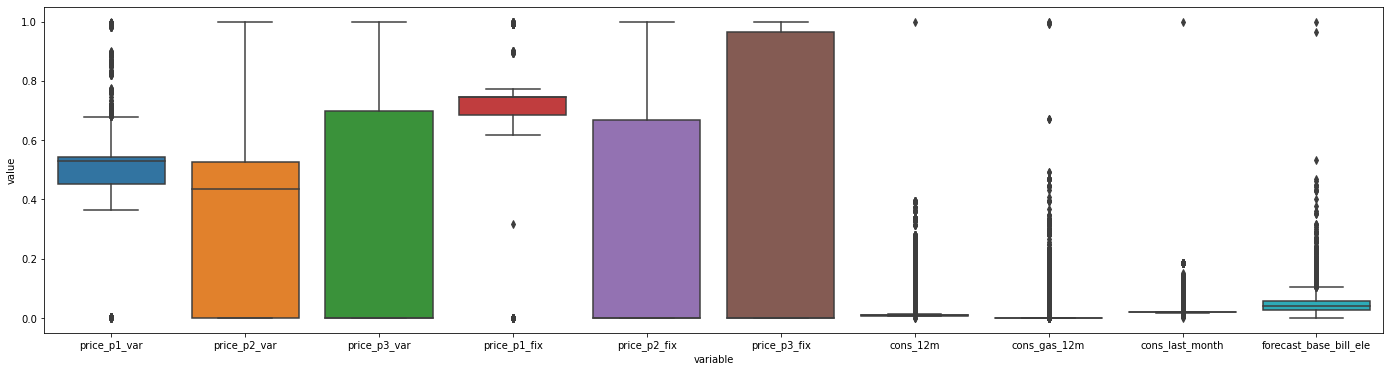

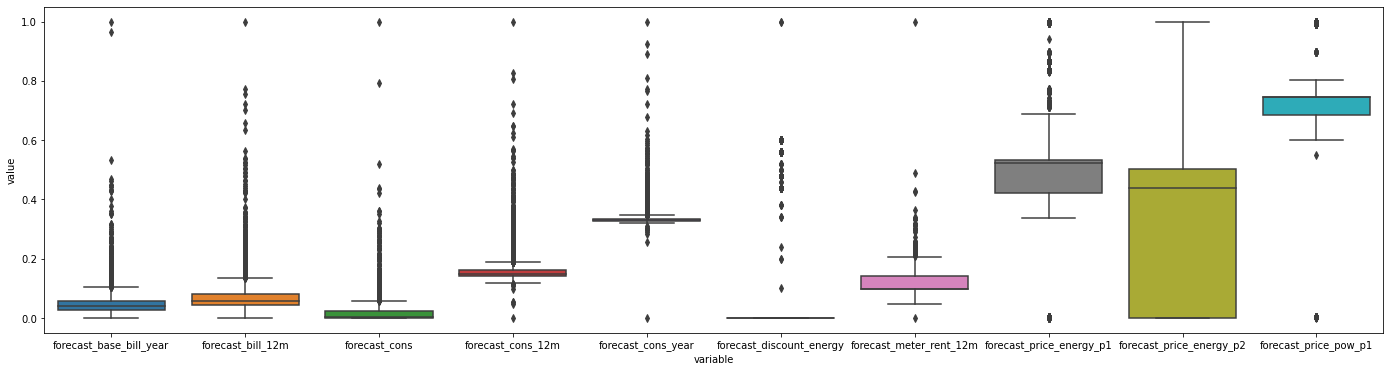

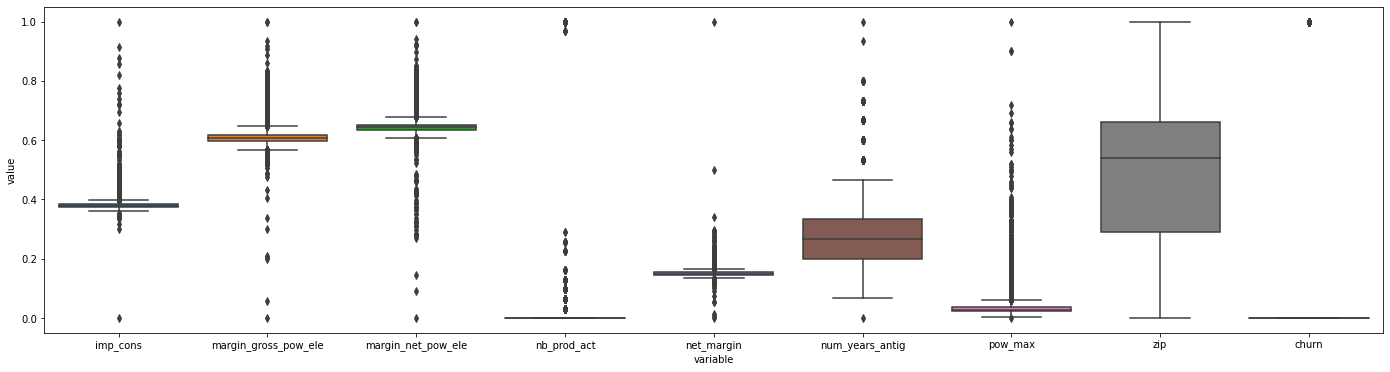

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

width=10

for i in range(int(np.ceil(train_df.select_dtypes(include='number').shape[1]/width))):
    df=train_df.select_dtypes(include='number')
    df=(df-df.min())/(df.max()-df.min())
    train_df_melt=pd.melt(df.iloc[:, i*width:(i+1)*width])
    plt.figure(figsize=(24, 6))
    sns.boxplot(x='variable', y='value', data=train_df_melt)

Otra forma de mirar los mismos datos es mediante un histograma. En este caso, adicionalmente, podemos usar el color para representar la variable de clase (`churn`). Esto nos permitirá apreciar, si las hay, diferencias en la distribución de una variable dependiendo de la clase a la que pertenezcan las instancias.

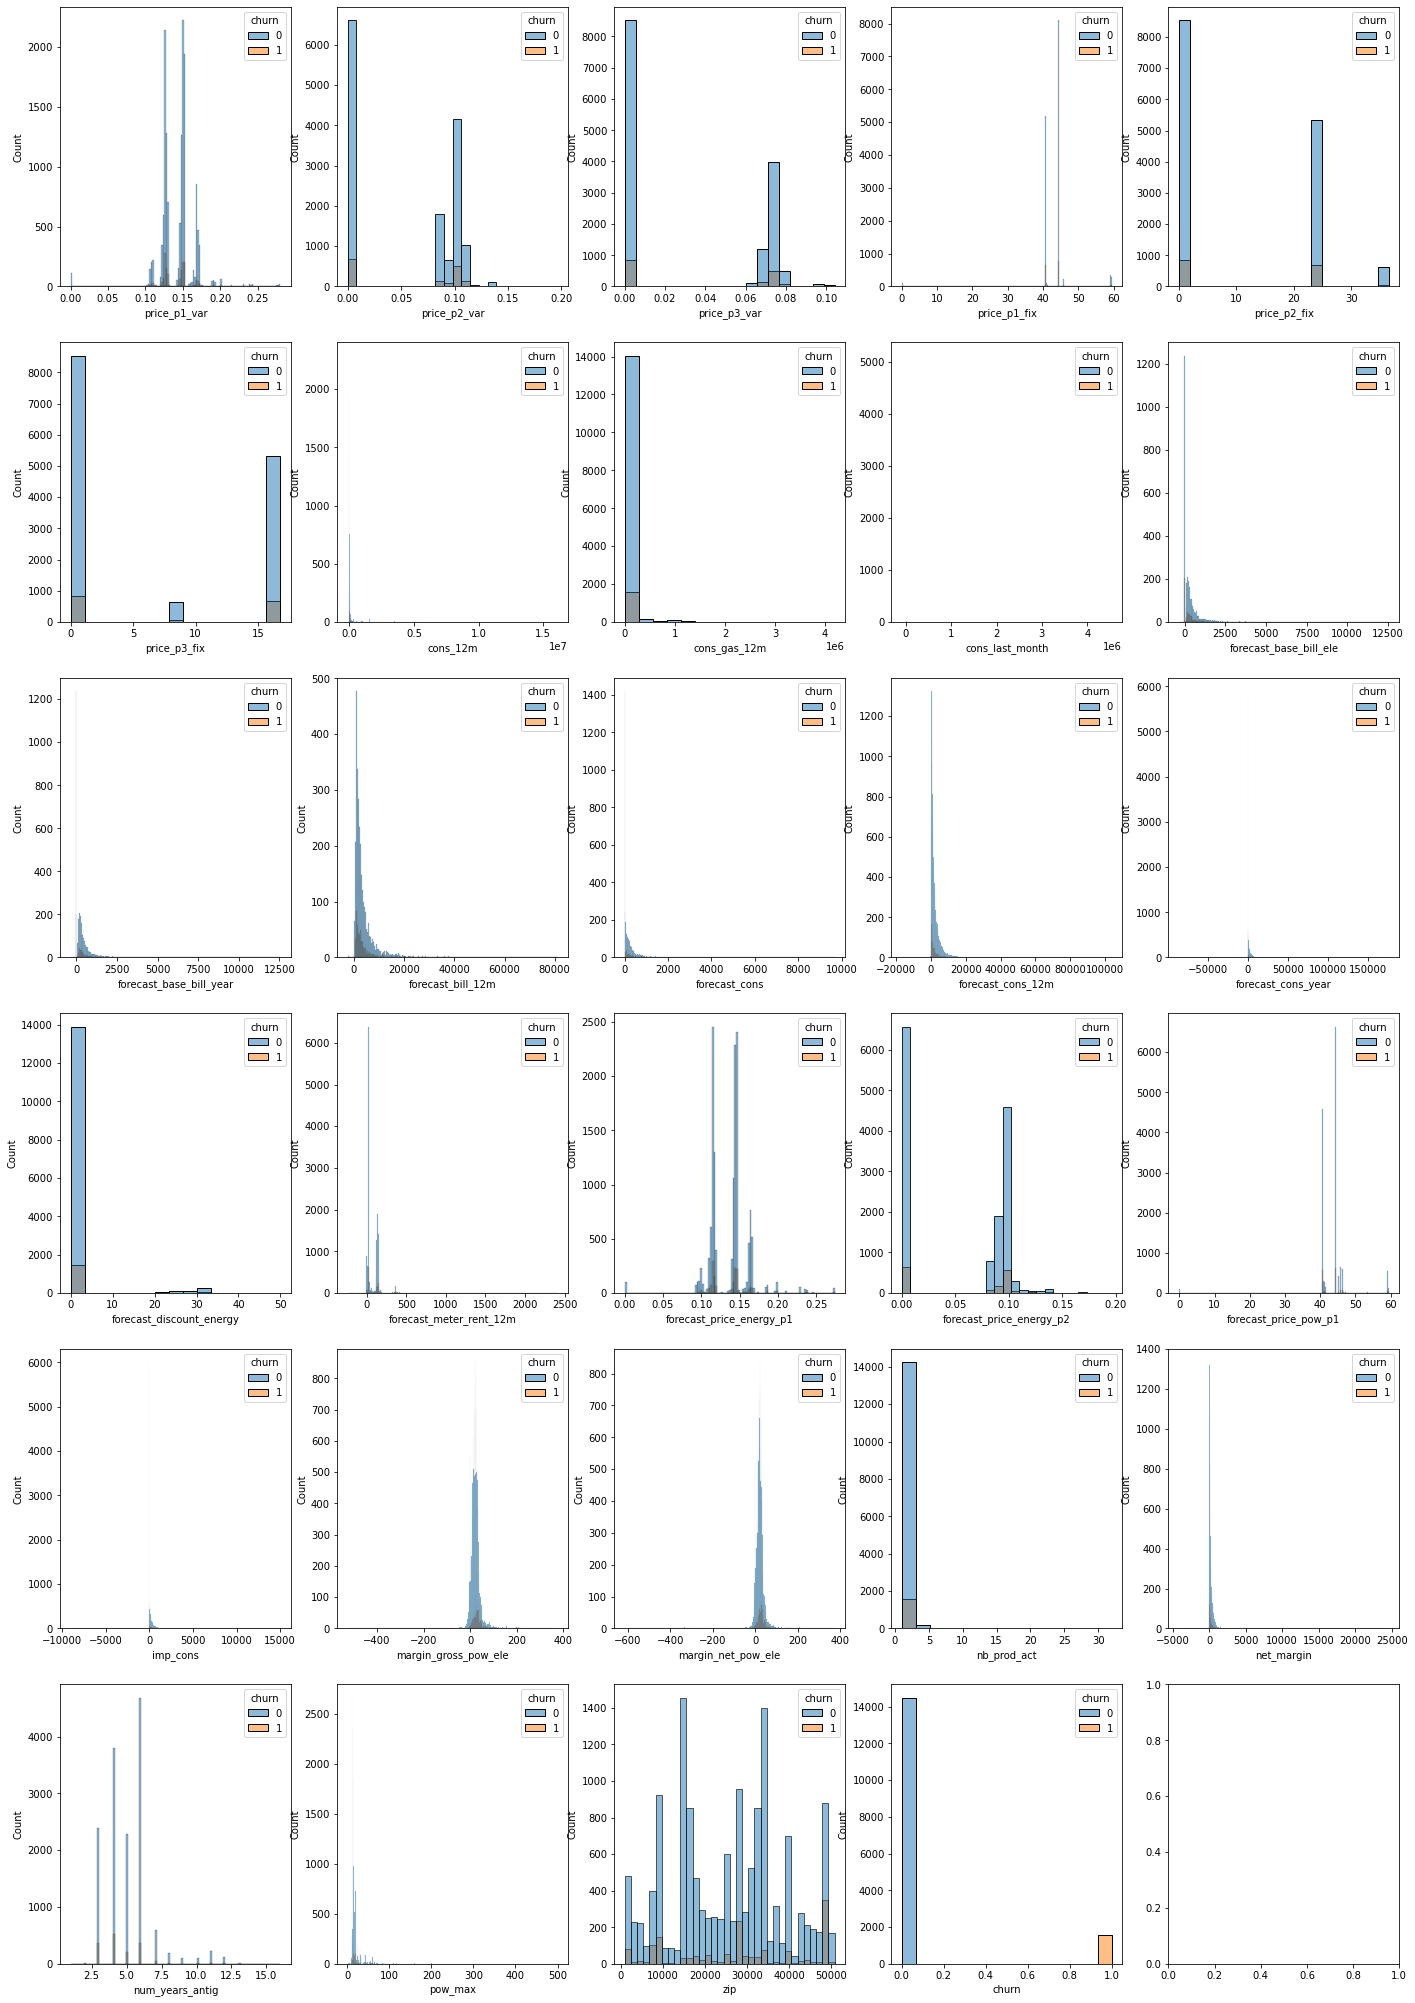

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df=train_df.select_dtypes(include='number')

fig, axes = plt.subplots(6, 5, figsize=(24, 36), sharey=False)
i=0

for col in df.columns:
    sns.histplot(ax=axes[i//5, i%5], x=col, hue='churn', data=df)
    i=i+1

Otra manera de obtener una información similar es mediante boxplots donde se segmente por categoría (en este caso, de acuerdo a la variable `churn`). A continuación, se muestran dos ejemplos que no pueden apreciarse claramente en la matriz de gráficos anterior.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

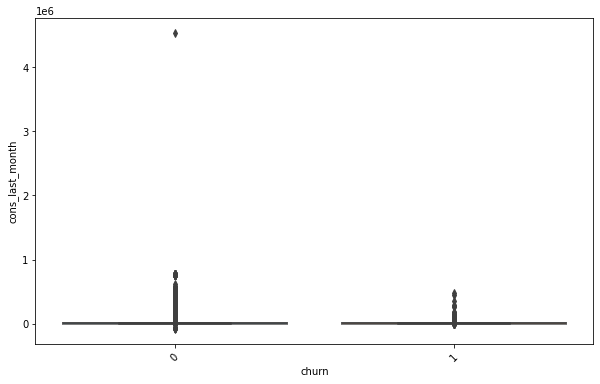

In [25]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='churn', y='cons_last_month', data=train_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

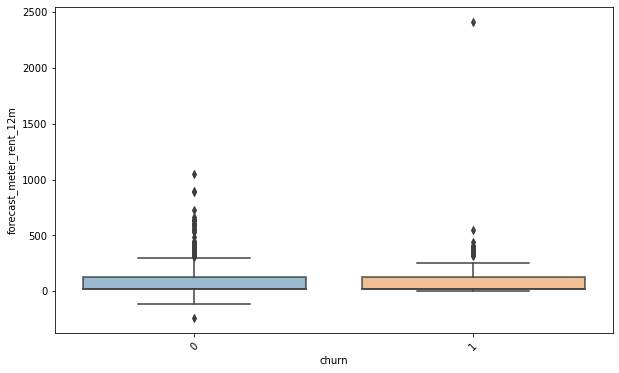

In [26]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='churn', y='forecast_meter_rent_12m', data=train_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=45)

En el caso de las variables categóricas, una gráfica que nos proporciona bastante información es el diagrama de barras. No permite observar la distribución de instancias por categoría, lo cual nos permitirá tomar decisiones como descartar una variable si la mayoría de las instancias pertenecen a la misma categoría o eliminar categorías (o agruparlas) en el caso de que las frecuencias entre éstas esté muy desbalanceada.

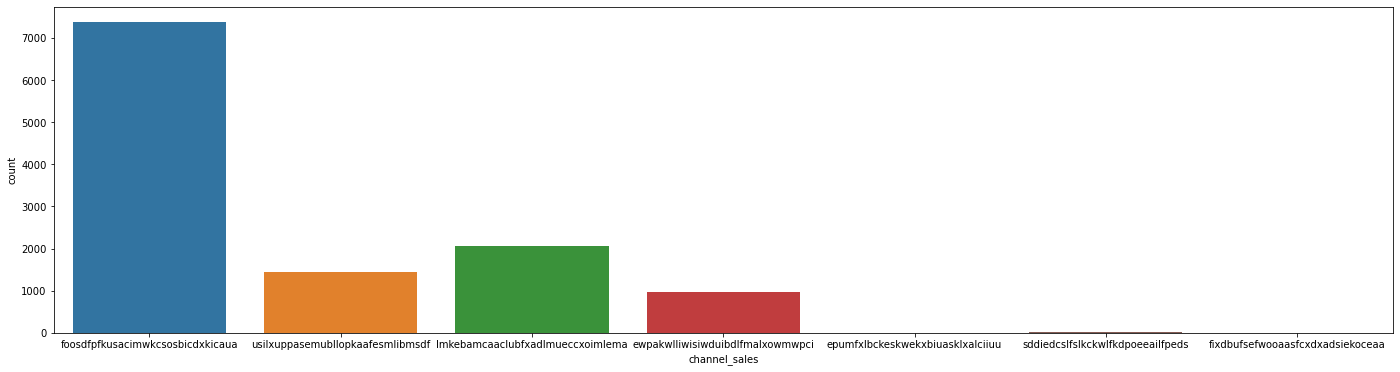

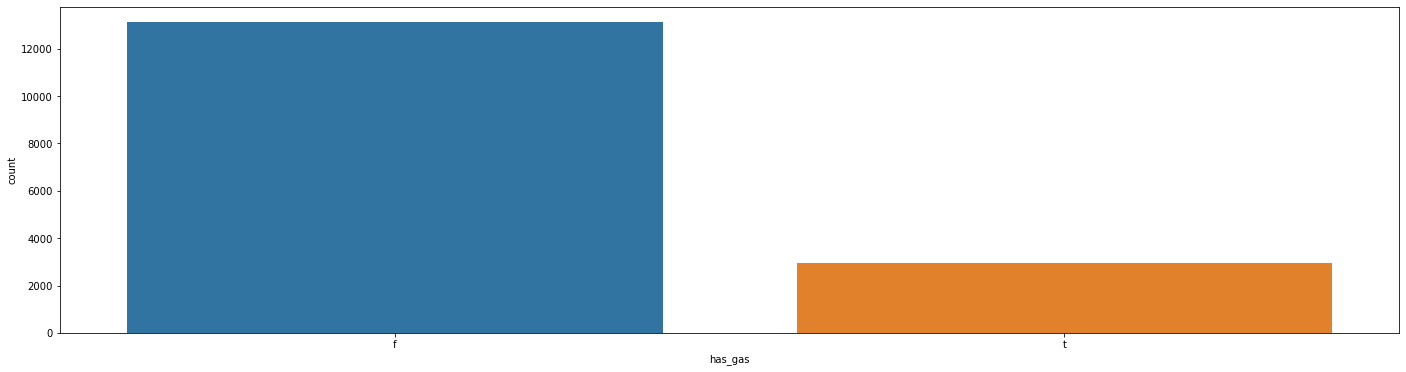

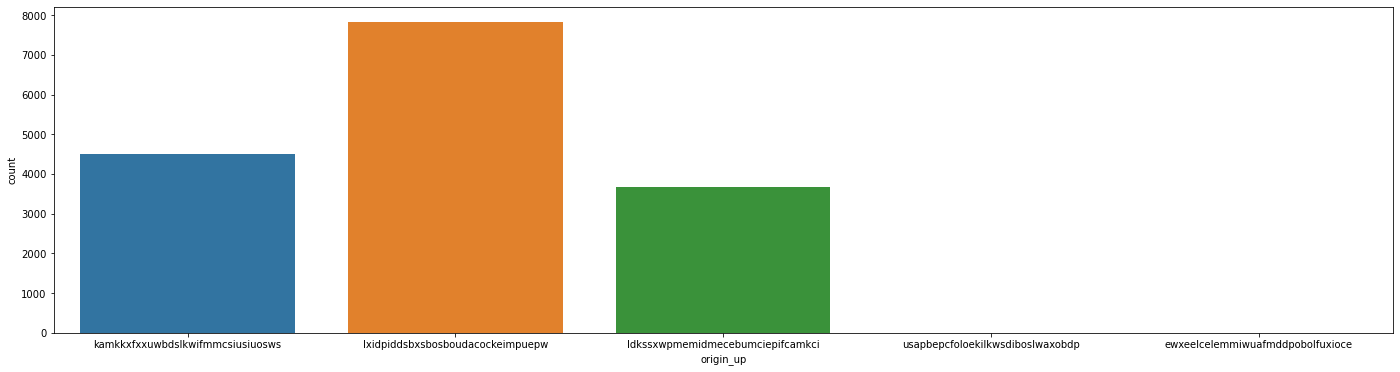

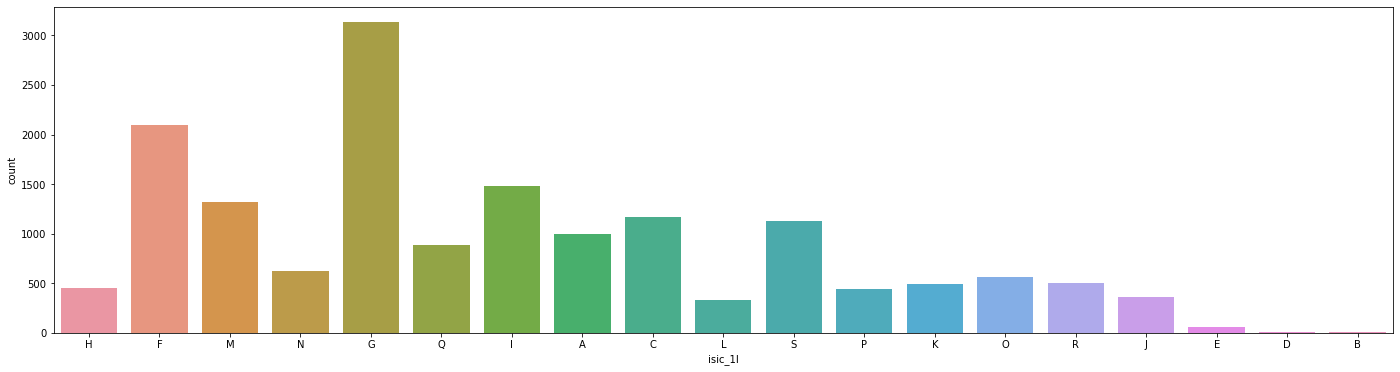

In [27]:
for col in train_df.select_dtypes(include='object').columns:
    plt.figure(figsize=(24, 6))
    sns.countplot(x=col, data=train_df)

Un último tipo de gráfica que vamos a generar es un mapa de calor que nos permita observar la correlación existente entre las variables. Esto nos va a permitir identificar pares (o grupos) de variables altamente correladas. Más adelante, usaremos esta información como criterio en la toma de decisiones para descartar variables redundantes en la fase de modelado.

In [28]:
corr_mat=train_df.select_dtypes(include='number').corr().stack().reset_index(name='correlation')

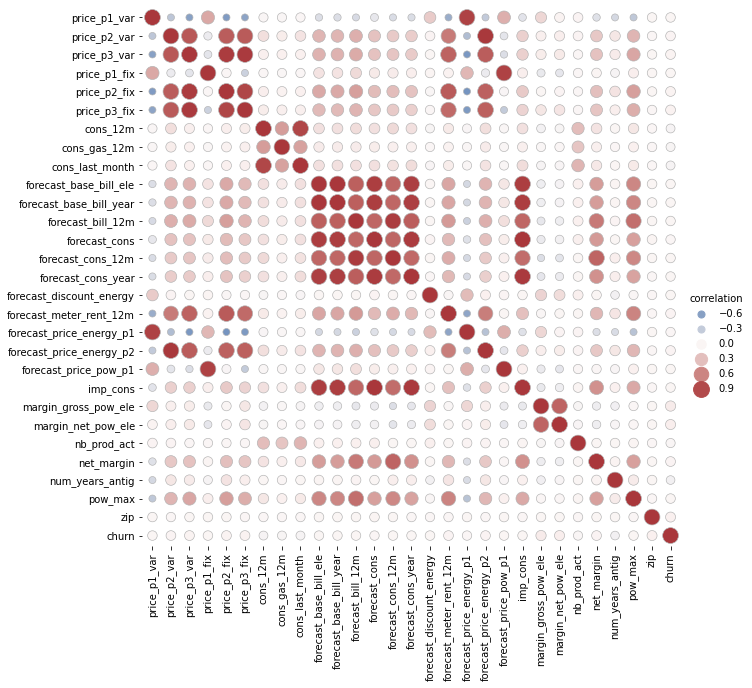

In [29]:
g=sns.relplot(
    data=corr_mat,
    x='level_0', y='level_1', hue='correlation', size='correlation',
    palette='vlag', hue_norm=(-1, 1), edgecolor='.7',
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

g.set(xlabel='', ylabel='', aspect='equal')
g.despine(left=True, bottom=True)
g.ax.margins(.02)

for label in g.ax.get_xticklabels():
    label.set_rotation(90)

Un ejemplo claro es el *cluster* formado por las variables `forecast*`, de las cuales probablemente podamos descartar varias, ya que tenemos correlaciones por encima del 70% en todos los casos (y varias por encima del 95%).

In [30]:
train_df.select_dtypes(include='number').corr().loc[['forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year'], ['forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year']]

,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year
forecast_base_bill_ele,1.000000,1.000000,0.794709,0.964396,0.750884,0.958294
forecast_base_bill_year,1.000000,1.000000,0.794709,0.964396,0.750884,0.958294
forecast_bill_12m,0.794709,0.794709,1.000000,0.751358,0.970478,0.797220
forecast_cons,0.964396,0.964396,0.751358,1.000000,0.758757,0.974412
forecast_cons_12m,0.750884,0.750884,0.970478,0.758757,1.000000,0.746053
forecast_cons_year,0.958294,0.958294,0.797220,0.974412,0.746053,1.000000


Por último, y aunque no forme parte de los contenidos que este *notebook* pretende ilustrar, existe un paquete llamado `pandas_profiling` que permite generar muchas de las cosas que hemos visto de manera automatizada (aunque, al generar mucha información, podría ser más complicado centrarnos en lo más relevante y/o extraer la información que más nos interese de cara a, por ejemplo, preparar un informe).

In [31]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(train_df)

# Saving report as PDF
#report.to_file(output_file='train_df_pandas.html')

In [32]:
#report

## 2.3 Gestión de valores nulos

Otro paso importante en la preparación de nuestros datos previa al modelado es el análisis de la presencia de nulos en nuestras variables.

Podemos consultar en un listado de todas las variables cuáles tienen nulos.

In [33]:
train_df.isna().sum()

price_p1_var                    0
price_p2_var                    0
price_p3_var                    0
price_p1_fix                    0
price_p2_fix                    0
price_p3_fix                    0
channel_sales                4212
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12579
date_modif_prod               156
date_renewal                   40
forecast_base_bill_ele      12579
forecast_base_bill_year     12579
forecast_bill_12m           12579
forecast_cons               12579
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      124
forecast_meter_rent_12m         0
forecast_price_energy_p1      124
forecast_price_energy_p2      124
forecast_price_pow_p1         124
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow

También podemos pintar un diagrama de barras con la proporción de nulos para cada variable que tiene al menos uno. Como podemos observar, hay 5 variables con una presencia de nulos de cerca del 80%. A continuación, hay otra variable con cerca de un 30% de nulos. El resto de variables tienen una presencia de nulos muy pequeña.

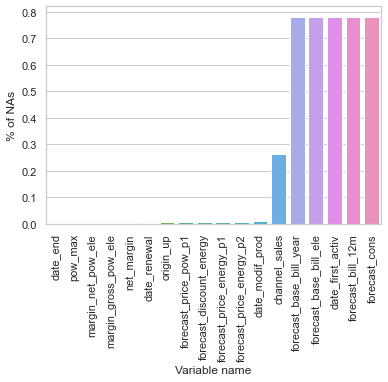

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values=train_df.isnull().sum()/len(train_df)
missing_values=missing_values[missing_values>0]
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values.columns=['count']
missing_values['variable']=missing_values.index
missing_values

sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='variable', y='count', data=missing_values)
plt.xlabel('Variable name')
plt.ylabel('% of NAs')
plt.xticks(rotation = 90)
plt.show()

Lo siguiente que debemos hacer es tomar una decisión sobre qué hacer con las variables que tienen nulos.

Una primera opción es eliminar las instancias con presencia de nulos en alguna de sus variables. Sin embargo, en este conjunto de datos hay varias variables con una presencia de nulos altísima, por lo que no es una opción.

La segunda opción es eliminar las variables con una alta proporción de nulos (las cinco que hemos identificado, y habría que ver si la sexta también).

Y, por último, nos queda la opción de llevar a cabo una imputación, para rellenar los huecos. Esto podría tener sentido para las variables con baja proporción de nulos, no tanto seguramente para las que están por encima del 80%.

Por todo lo anterior, y con el objetivo de ilustrar el proceso de imputación de nulos, vamos a proceder a rellenar los huecos para las variables con un porcentaje de nulos bajo y a descartar aquéllas con demasiados nulos.

Primero, descartamos las 5 columnas con más nulos.

In [35]:
train_df=train_df.drop(['forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'date_first_activ'], axis=1)

Para hacer la imputación de nulos, vamos a usar la clase `IterativeImputer` de `sklearn`, que se basa en el funcionamiento del paquete `MICE` de `R`, uno de los más utilizados para este trabajo.

In [36]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

Para poder llevar a cabo el proceso, seleccionamos las columnas (numéricas) que usaremos en la imputación, a excepción de la columna `churn`, para no contaminar el proceso. Si quisiéramos ir un paso más allá, podríamos efectuar la imputación tras haber dividido el conjunto de datos en una parte de aprendizaje y otra de validación, aunque en la práctica no suele suponer un gran problema.

In [37]:
train_to_imp_df=train_df.select_dtypes(include="number").drop("churn", axis=1)

imp=IterativeImputer(max_iter=100)

Antes de efectuar la imputación de nulos, vamos a reescalar nuestros datos, porque tenemos variables con valores muy altos que podrían crear errores numéricos.

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
train_to_imp_np=scaler.fit_transform(train_to_imp_df)

Ahora sí, llevamos a cabo la imputación.

In [39]:
train_imputed=imp.fit_transform(train_to_imp_np)

Y deshacemos el reescalado para seguir con nuestro análisis.

In [40]:
train_imputed=scaler.inverse_transform(train_imputed)

Como el resultado devuelto por los métodos `fit_transform` es siempre un `array` de `numpy`, vamos a recrear un *DataFrame* con esa información y los nombre de columna adecuados.

In [41]:
train_imputed_df=pd.DataFrame(train_imputed, columns=train_to_imp_df.columns)

Podemos asegurarnos de que los nulos han desaparecido.

In [42]:
train_imputed_df.isna().sum()

price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
pow_max                     0
zip                         0
dtype: int64

Ahora ya sólo resta volver a integrar las columnas que hemos imputado en el *dataset* original. Para ello, seleccionaremos, del conjunto original, las columnas que no han pasado por el imputador.

In [43]:
df_to_append=train_df.loc[:, ~train_df.columns.isin(train_to_imp_df.columns)]

A continuación, restauramos el índice en el *DataFrame* imputado.

In [44]:
train_imputed_df.index=train_df.index

Ya sólo resta concatenar ambos *DataFrames*.

In [45]:
train_imputed_final=pd.concat([train_imputed_df, df_to_append], axis=1)

Reordenar las columnas.

In [46]:
train_imputed_final=train_imputed_final[train_df.columns]

Y hacer una copia de este último *DataFrame*, para trabajar a partir de este momento.

In [47]:
df_clean=train_imputed_final.copy()
df_clean.head()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,channel_sales,cons_12m,cons_gas_12m,cons_last_month,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,isic_1l,zip,churn
id,,,,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.126098,0.103975,0.073719,40.728885,24.437330,16.291555,foosdfpfkusacimwkcsosbicdxkicaua,22034.0,0.0,3084.0,...,43.08,43.08,1.0,81.42,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,H,25182.0,0
0004351ebdd665e6ee664792efc4fd13,0.148047,0.000000,0.000000,44.444710,0.000000,0.000000,NaN,4060.0,0.0,0.0,...,24.42,24.42,1.0,61.58,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,F,33779.0,0
0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.000000,0.000000,usilxuppasemubllopkaafesmlibmsdf,7440.0,0.0,1062.0,...,38.58,38.58,2.0,81.61,3.0,lxidpiddsbxsbosboudacockeimpuepw,13.856,M,9219.0,0
0010ee3855fdea87602a5b7aba8e42de,0.122157,0.100029,0.069027,40.647429,24.388455,16.258972,lmkebamcaaclubfxadlmueccxoimlema,4199490.0,728810.0,456462.0,...,-2.80,-2.80,2.0,897.08,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,33.000,M,42240.0,0
00114d74e963e47177db89bc70108537,0.149434,0.000000,0.000000,44.266930,0.000000,0.000000,ewpakwlliwisiwduibdlfmalxowmwpci,11272.0,0.0,0.0,...,29.76,29.76,1.0,157.99,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,H,33519.0,0


In [48]:
df_clean.shape

(16081, 33)

In [49]:
df_clean.columns

Index(['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'isic_1l',
       'zip', 'churn'],
      dtype='object')

## 2.4 Ingeniería de características

Vamos a continuación a proponer una serie de cambios en el conjunto de datos, centrados en la creación/modificación de las características de nuestro juego de datos. A este paso se le llama *feature engineering*.

#### Modificación de producto

En primer lugar, nos vamos a fijar en la variable `date_modif_prod`, que codifica la última fecha de modificación del producto contratado.

Podemos comprobar cuántos valores únicos tenemos para esa fecha (muchos) y cuántos nulos (no demasiados).

In [50]:
print(len(df_clean['date_modif_prod'].unique()))
print(df_clean['date_modif_prod'].isnull().sum())

2308
156


A partir de esta variable podemos crear una nueva variable que represente, simplemente, si un cliente modificó el producto contratado (tenemos una fecha de este evento) o no.

In [51]:
df_clean['date_modif_prod_dummy']=np.where(df_clean['date_modif_prod'].isnull(), 0, 1)

print(df_clean['date_modif_prod_dummy'].unique())
print(df_clean['date_modif_prod_dummy'].isnull().sum())

[1 0]
0


También podemos crear otra variable que represente el número de días transcurridos entre la modificación del contrato y la fecha de referencia del estudio.

In [52]:
ref_date=np.datetime64('2016-03-31')

df_clean['date_modif_prod_days']=df_clean['date_modif_prod'].map(lambda x: (ref_date-x).days)
df_clean['date_modif_prod_days']=df_clean['date_modif_prod_days'].fillna(0).astype(int)

#### Renovación de contrato

Podemos repetir la misma estrategia que con la fecha de modificación del producto, esta vez con la renovación del contrato.

In [53]:
print(len(df_clean['date_renewal'].unique()))
print(df_clean['date_renewal'].isnull().sum())

399
40


Primero creamos la variable que representa si hubo o no renovación.

In [54]:
df_clean['date_renewal_dummy']=np.where(df_clean['date_renewal'].isnull(), 0, 1)

print(df_clean['date_renewal_dummy'].unique())
print(df_clean['date_renewal_dummy'].isnull().sum())

[1 0]
0


Y, a continuación, la que representa el número de días desde la renovación a la fecha de referencia.

In [55]:
df_clean['date_renewal_days']=df_clean['date_renewal'].map(lambda x: (ref_date-x).days)
df_clean['date_renewal_days']=df_clean['date_renewal_days'].fillna(0).astype(int)

#### Días transcurridos entre la modificación y la finalización del contrato

En este caso vamos a añadir una característica que represente el número de días existentes entre la modificación del producto contratado y la fecha de finalización de contrato.

Como en casos anteriores, comprobamos valores únicos y nulos.

In [56]:
print(len(df_clean['date_modif_prod'].unique()))
print(df_clean['date_modif_prod'].isnull().sum())
print(len(df_clean['date_end'].unique()))
print(df_clean['date_end'].isnull().sum())

2308
156
372
2


Y ahora creamos la variable nueva:
- La construimos como la diferencia entre las dos fechas.
- Aplicamos una función *lambda* a cada elemento de la nueva columna para convertirlo en un número de días entero (en lugar de un *TimeDelta*).
- Para aquellos valores nulos que pudieran existir (por faltar una u otra fecha) introducimos un 0.

Finalmente, comprobamos con una instancia que el cálculo se ha hecho correctamente.

In [57]:
df_clean['date_end_vs_modif']=df_clean['date_end']-df_clean['date_modif_prod']

df_clean['date_end_vs_modif']=df_clean['date_end_vs_modif'].apply(lambda x: x.days)

df_clean['date_end_vs_modif']=df_clean['date_end_vs_modif'].fillna(0).astype(int)

print(df_clean['date_end'][10])
print(df_clean['date_modif_prod'][10])
print(df_clean['date_end_vs_modif'][10])

2016-06-29 00:00:00
2015-06-29 00:00:00
366


#### Canal de compras

La variable canal de compras del producto contratado es una variable categórica con 7 posibles valores, más unas cuantas instancias que tienen un valor nulo para la misma. De estas siete categorías, 3 tienen muy pocas instancias con esos valores, por lo que son candidatas a ser fusionadas en una única categoría, llegado el caso, y dependiendo del algoritmo utilizado en la fase de modelado.

Comencemos viendo las distintas categorías y sus frecuencias.

In [58]:
df_clean['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7371
lmkebamcaaclubfxadlmueccxoimlema    2070
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

También podemos observar la proporción de nulos.

In [59]:
np.sum(df_clean['channel_sales'].isnull())

4212

Para poder integrar esta variable en nuestros modelos, deberemos llevar a cabo una recodificación con variables *dummy*. Como los nombres no son m uy descriptivos, asignaremos nuestros propios nombres, numerados consecutivamente. Para las instancias con valores nulos, crearemos una variable *dummy* específica.

Por último, la numeración recogida a continuación respeta el orden de la tabla de frecuencias de más arriba: *channel_1* es el canal con más ventas, etc.

In [60]:
channel_dummies=pd.get_dummies(df_clean['channel_sales'])

channel_dummies.columns=['channel_6', 'channel_4', 'channel_7', 'channel_1', 'channel_2', 'channel_5', 'channel_3']
channel_dummies.sort_index(axis=1, inplace=True)

channel_dummies['channel_unknown']=np.where(df_clean['channel_sales'].isnull(), 1, 0)
channel_dummies

,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_unknown
id,,,,,,,,
0002203ffbb812588b632b9e628cc38d,1,0,0,0,0,0,0,0
0004351ebdd665e6ee664792efc4fd13,0,0,0,0,0,0,0,1
0010bcc39e42b3c2131ed2ce55246e3c,0,0,1,0,0,0,0,0
0010ee3855fdea87602a5b7aba8e42de,0,1,0,0,0,0,0,0
00114d74e963e47177db89bc70108537,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,1,0,0,0,0,0,0,0
fffac626da707b1b5ab11e8431a4d0a2,0,0,0,1,0,0,0,0
fffc0cacd305dd51f316424bbb08d1bd,1,0,0,0,0,0,0,0


Nos aseguramos de que tenemos tantos unos en estas variables como instancias:

In [61]:
np.sum(channel_dummies.values)


16081

Y combinamos la información con el *dataset* original, usando los índices como clave para el *merge*. Más adelante eliminaremos, junto a otras, la variable original, redundante a partir de este momento.

In [62]:
df_clean=df_clean.merge(channel_dummies, left_index=True, right_index=True)

#### Clientes en último año de contrato

Otro factor que, potencialmente, podría influir en que un cliente deje la compañía es que se acerque al final de la duración media de su contrato. Haciendo un análisis sobre parte de los datos, podríamos deducir una duración media de en torno a 5 años (si bien es cierto que este estudio habría que hacerlo con más rigurosidad).

Por ejemplo:

In [63]:
df_clean[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'num_years_antig']].iloc[10]

date_activ         2009-09-15 00:00:00
date_end           2016-06-29 00:00:00
date_modif_prod    2015-06-29 00:00:00
date_renewal       2014-09-16 00:00:00
num_years_antig                    6.0
Name: 001cb880d847a0b63b404a48e50aec17, dtype: object

Por lo tanto, podemos crear una nueva variable que etiquete a aquellos clientes que están en su último año de contrato asumiendo esa duración media de 5 años.

In [64]:
df_clean['arriving_contract_end']=np.where((train_df['num_years_antig']%5)>=4, 1, 0)

print(df_clean['arriving_contract_end'].value_counts())

0    11646
1     4435
Name: arriving_contract_end, dtype: int64


#### Código de la campaña de captación

De manera similar a como ocurría con la variable canal de ventas, esta variable es categórica y codifica, con un *hash*, el código de la campaña de captación a través de la cual el cliente se dio de alta en la compañía. También de manera similar, dos de las campañas tienen muy pocas instancias y podrían ser fusionadas (o, incluso, las instancias descartadas) y algunos valores nulos.

Comprobamos las categorías y sus frecuencias.

In [65]:
df_clean['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7819
kamkkxfxxuwbdslkwifmmcsiusiuosws    4511
ldkssxwpmemidmecebumciepifcamkci    3661
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Y la presencia de nulos.

In [66]:
np.sum(df_clean['origin_up'].isnull())

87

Recodificamos las variables, de manera similar a como lo hicimos con la variable canal de venta.

In [67]:
origin_dummies=pd.get_dummies(df_clean['origin_up'])

origin_dummies.columns=['origin_5', 'origin_2', 'origin_3', 'origin_1', 'origin_4']
origin_dummies.sort_index(axis=1, inplace=True)

origin_dummies['origin_unknown']=np.where(df_clean['origin_up'].isnull(), 1, 0)
origin_dummies

,origin_1,origin_2,origin_3,origin_4,origin_5,origin_unknown
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0,1,0,0,0,0
0004351ebdd665e6ee664792efc4fd13,0,1,0,0,0,0
0010bcc39e42b3c2131ed2ce55246e3c,1,0,0,0,0,0
0010ee3855fdea87602a5b7aba8e42de,0,1,0,0,0,0
00114d74e963e47177db89bc70108537,0,1,0,0,0,0
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,1,0,0,0,0,0
fffac626da707b1b5ab11e8431a4d0a2,1,0,0,0,0,0
fffc0cacd305dd51f316424bbb08d1bd,1,0,0,0,0,0


Comprobamos que tengamos el número correcto de unos en nuestras variables *dummy*.

In [68]:
np.sum(origin_dummies.values)


16081

Combinamos las nuevas variables con el *dataset* original, de nuevo, usando el índice como clave.

In [69]:
df_clean=df_clean.merge(origin_dummies, left_index=True, right_index=True)

Ahora vamos a examinar el *dataset* para comprobar que se han creado correctamente todas las nuevas variables.

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16081 entries, 0002203ffbb812588b632b9e628cc38d to ffff7fa066f1fb305ae285bb03bf325a
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price_p1_var              16081 non-null  float64       
 1   price_p2_var              16081 non-null  float64       
 2   price_p3_var              16081 non-null  float64       
 3   price_p1_fix              16081 non-null  float64       
 4   price_p2_fix              16081 non-null  float64       
 5   price_p3_fix              16081 non-null  float64       
 6   channel_sales             11869 non-null  object        
 7   cons_12m                  16081 non-null  float64       
 8   cons_gas_12m              16081 non-null  float64       
 9   cons_last_month           16081 non-null  float64       
 10  date_activ                16081 non-null  datetime64[ns]
 11  date_end                  1

Una vez hecho lo anterior, procedemos a eliminar toda aquellas variables que no vamos a utilizar.

Comenzaremos con las variables de tipo fecha, varias de las cuales hemos transformado en otras variables derivadas, por lo que esta información la incorporamos a través de éstas.

In [71]:
df_clean=df_clean.select_dtypes(exclude=['datetime64'])

Eliminamos las variables *channel_sales* y *origin_up*, que hemos codificado con *dummies*.

In [72]:
df_clean=df_clean.drop(['channel_sales', 'origin_up'], axis=1)

Ahora, usamos la función `get_dummies` las dos variables categóricas restantes: *has_gas* e *isic_1l*. Podemos usar directamente esta función de *pandas* al ser dos variables sin presencia de nulos y con nombres para las categorías lo suficientemente descriptivos (y cortos). Si no fuera el caso, deberíamos haber procedido como con *channel_sales* y *origin_up*.

In [73]:
df_clean=pd.get_dummies(df_clean)

Por último, eliminamos el resto de variables que no vamos a utilizar (en este caso, sólo el código postal, porque las variables con muchos nulos las descartamos al principio).

In [74]:
df_clean=df_clean.drop(['zip'], axis=1)

Con nuestro *dataset* ya listo, vamos a hacer una copia (así, si metemos la pata más adelante, no tenemos que repetir todo el preprocesado y la creación de características).

In [75]:
df_final=df_clean.copy()

## División en conjunto de train y test

Dividimos el conjunto de datos en conjunto de entrenamiento (75%) y prueba (25%)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_final, test_size=0.25, random_state=1)

# separar del conjunto de entrenamiento y de prueba la varibale a clasificar
y_train = df_train['churn']
x_train = df_train.drop(columns=['churn'])
y_test = df_test['churn']
x_test = df_test.drop(columns=['churn'])

# normalizar los datos
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## Modelo de referencia: regresión logística

In [77]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

# obtener el modelo
clf = LogisticRegression(C=0.1, solver='liblinear')
# se entrena el modelo
clf.fit(x_train_std, y_train)
# clasificar con el modelo los valores del conjunto de prueba
y_pred = clf.predict(x_test_std)

#utilizar los coeficientes de precisión y F1 para evaluar el modelo
#puesto que la variable a clasificar está desbalanceada
precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Precisión: {precision}')
print(f'F1: {f1}')

Precisión: 0.5
F1: 0.010126582278481015


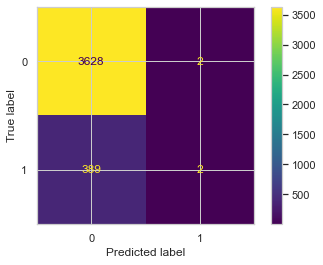

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Del coeficiente F1 y la matriz de correlación se observa que el modelo de regresión logística con los datos iniciales no clasifica correctamente los clientes que abandonan el servicio, o sea, la clase 1 de la variable churn

## Undersampling del conjunto de datos

La variable churn es desbalanceada, es necesario hacer undersampling para obtener resultados del modelo más precisos

In [79]:
cero_churn, uno_churn = df_final['churn'].value_counts()
print(f'No abandonan (0): {cero_churn}')
print(f'Abandonan (1): {uno_churn}')
print(f'Proporción de los valores de la variable churn: {uno_churn / cero_churn}')

No abandonan (0): 14494
Abandonan (1): 1587
Proporción de los valores de la variable churn: 0.10949358355181454


De la proporción calculada en la variable churn se comprueba que de cada 100 usuarios del servicio solo 10 abandonan.

In [80]:
#Undersampling aleatorio
from imblearn.under_sampling import RandomUnderSampler

#undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_train_under, y_train_under = undersample.fit_resample(x_train_std, y_train)

In [81]:
# Near Miss undersampling
# from imblearn.under_sampling import NearMiss

# undersample = NearMiss(version=3, n_neighbors=3)
# x_train_under, y_train_under = undersample.fit_resample(x_train_std, y_train)

## Actualización del modelo de referencia

In [82]:
# obtenemos el modelo
clf = LogisticRegression(solver='liblinear')
# se entrena el modelo con el conjunto de entrenamiento después de hacer el undersampling
clf.fit(x_train_under, y_train_under)
# clasificar con el modelo los valores del conjunto de prueba
# al conjunto de prueba no se le hace undersampling
y_pred = clf.predict(x_test_std)

precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Precisión: {precision}')
print(f'F1: {f1}')

Precisión: 0.21602787456445993
F1: 0.18289085545722714


In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Churn', 'Predicted No Churn'],
    index  =['True Churn', 'True No Churn']
)
print(conf)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3630
           1       0.22      0.16      0.18       391

    accuracy                           0.86      4021
   macro avg       0.56      0.55      0.55      4021
weighted avg       0.84      0.86      0.85      4021

               Predicted Churn  Predicted No Churn
True Churn                3405                 225
True No Churn              329                  62


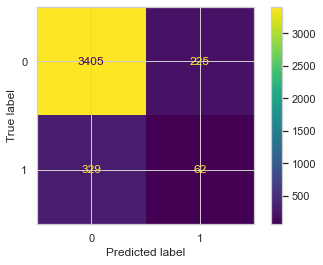

In [84]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

El modelo obtenido al hacer undersampling es mejor que el anterior teniendo en cuenta el coeficiente F1.

## Modelado con otros algoritmos

### Árboles de decisión

https://www.youtube.com/watch?v=ZVR2Way4nwQ

In [85]:
from sklearn.tree import DecisionTreeClassifier

# Crear el clasificador
clf = DecisionTreeClassifier(max_depth=12, criterion="entropy")
# Entrenar con el conjunto de prueba
clf = clf.fit(x_train_under, y_train_under)
#clasificar con el modelo los valores del conjunto de prueba
y_pred = clf.predict(x_test_std)

precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Precisión: {precision}')
print(f'F1: {f1}')

Precisión: 0.1846590909090909
F1: 0.23744292237442924


In [ ]:
from sklearn.ensemble import tree as t
import graphviz

dot_data=t.export_graphviz(clf, out_file=None, 
                        feature_names=x_test.columns,  
                        class_names=["No Churn", "Churn"],
                        filled=True, rounded=True,  
                        special_characters=True)  
graph=graphviz.Source(dot_data)  
graph 

### Random Forest

https://www.youtube.com/watch?v=v6VJ2RO66Ag

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador
clf=RandomForestClassifier(n_estimators=100)

# Entrenar con el conjunto de prueba
clf.fit(x_train_under, y_train_under)

#clasificar con el modelo los valores del conjunto de prueba
y_pred=clf.predict(x_test_std)

precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Precisión: {precision}')
print(f'F1: {f1}')

Precisión: 0.27053140096618356
F1: 0.2782608695652174


### Redes neuronales

In [97]:
from sklearn.neural_network import MLPClassifier

# Crear el clasificador
clf = MLPClassifier(activation='logistic', solver='sgd', 
                    alpha=0.0001, learning_rate_init=0.002, max_iter=500)

# Entrenar con el conjunto de prueba
clf.fit(x_train_under, y_train_under)

#clasificar con el modelo los valores del conjunto de prueba
y_pred=clf.predict(x_test_std)

precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Precisión: {precision}')
print(f'F1: {f1}')

Precisión: 0.24267782426778242
F1: 0.18412698412698417


### Máquinas de vectores de soporte SVM

In [98]:
from sklearn import svm

# Crear el clasificador
clf = svm.SVC(C=1.5, kernel='rbf') # además de ‘rbf’ se probó con los kernels ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
# Entrenar con el conjunto de prueba
clf = clf.fit(x_train_under, y_train_under)
#clasificar con el modelo los valores del conjunto de prueba
y_pred = clf.predict(x_test_std)

precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'Precisión: {precision}')
print(f'F1: {f1}')

Precisión: 0.1724137931034483
F1: 0.1468428781204112


## Ajuste de hiper-parámetros

- En el modelo de regresión logística usado como referencia se ajustaron los siguientes parámetros

    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    - regularización (C) - 0.05
    - algoritmo de optimización (solver) - liblinear

Para hacer undersampling se ajustó la estrategia de muestreo, de una proporción 1:10 a una proporción 1:5.
También se probaron otras estrategias como Near Miss con la diferentes versiones.

- Al utilizar el modelo de árboles de decisión se ajustaron los siguientes parámetros

    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
     - profundidad máxima del árbol de búsqueda (max_depth) - 12
     - criterio para medir la calidad de la división en el árbol (criterion) - entropy


- Al utilizar máquinas de vectores soporte se ajustaron los parámetros

    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
     - kernel - rbf
     - regularización (C) - 1.5

## Selección de características

Se trabaja en el DataFrame df_final

In [99]:
df_final=df_clean.copy()
df_final.columns

Index(['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'pow_max', 'churn', 'date_modif_prod_dummy', 'date_modif_prod_days',
       'date_renewal_dummy', 'date_renewal_days', 'date_end_vs_modif',
       'channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5',
       'channel_6', 'channel_7', 'channel_unknown', 'arriving_contract_end',
       'origin_1', 'origin_2', 'origin_3', 'origin_4', 'origin_5',
       'origin_unknown', 'has_gas_f', 'has_gas_t', 'isic_1l_A', 'isic_1l_B',
       'isic_1l_C', 'isic_1l_D', 'isic_1l_E', 'isic_1l_F', 'isic_1l_G',
       'isi

Se crea la lista seleccion con las variables: isic_1l, Isic_2l y origin_up. Después se aplica  df_final drop de la lista seleccion. 

In [100]:
seleccion = ['isic_1l_A', 'isic_1l_B', 'isic_1l_C', 'isic_1l_D', 'isic_1l_E', 'isic_1l_F', 'isic_1l_G', 'isic_1l_H',
       'isic_1l_I', 'isic_1l_J', 'isic_1l_K', 'isic_1l_L', 'isic_1l_M',
       'isic_1l_N', 'isic_1l_O', 'isic_1l_P', 'isic_1l_Q', 'isic_1l_R', 'isic_1l_S', 'origin_5', 'origin_2', 'origin_3', 
       'origin_1', 'origin_4']
df_final.drop(columns=seleccion, inplace=True)

In [101]:
df_final.columns

Index(['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'pow_max', 'churn', 'date_modif_prod_dummy', 'date_modif_prod_days',
       'date_renewal_dummy', 'date_renewal_days', 'date_end_vs_modif',
       'channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5',
       'channel_6', 'channel_7', 'channel_unknown', 'arriving_contract_end',
       'origin_unknown', 'has_gas_f', 'has_gas_t'],
      dtype='object')

Se ha comprobado que quitando las características isic_1l, Isic_2l y origin_up se mejora en la precisión del modelo, unque no tanto en su desempeño general de acuerdo al coeficiente F1.

## Interpretación de los modelos

El modelo de regresión logística tomado como referencia inicial, sin hacer undersampling tiene un desempeño bastante malo. Como se muestra en la matriz de confusión, de los clientes que dejan el servicio solo es capáz de identificar 1 de 391 que realmente lo abandona incluídos en el conjunto de prueba.

Al aplicar la técnica de undersampling y actualizar el modelo de referencia se logra aumentar la precisión del modelo, logrando indentificar 44 de los 391 incluídos en el conjunto de prueba.

Con los árboles de decisión el resultado anterior no mejora luego de actualizar los parámetros del modelo. Por otra parte, al utilizar las máquinas de vectores de soporte se obtiene una mejor precisión aunque le desempeño del modelo de manera general sigue siendo el mismo de acuerdo al coeficiente F1.